In [1]:
import os

def walk_through_dir(dir):
    """
    :params dir: directory path in which you want to check no of files
    :returns: It will print length directory name, files and directory path  
    """
    for dirpath, dirnames, filenames in os.walk(dir):
        print(f'Directory name {len(dirnames)} and files {len(filenames)} and path {dirpath}')

walk_through_dir('D:/DeepLearning/PyTorch/DiseaseDetection/data')

Directory name 3 and files 1 and path D:/DeepLearning/PyTorch/DiseaseDetection/data
Directory name 3 and files 0 and path D:/DeepLearning/PyTorch/DiseaseDetection/data\test
Directory name 0 and files 100 and path D:/DeepLearning/PyTorch/DiseaseDetection/data\test\Potato___Early_blight
Directory name 0 and files 16 and path D:/DeepLearning/PyTorch/DiseaseDetection/data\test\Potato___healthy
Directory name 0 and files 100 and path D:/DeepLearning/PyTorch/DiseaseDetection/data\test\Potato___Late_blight
Directory name 3 and files 0 and path D:/DeepLearning/PyTorch/DiseaseDetection/data\train
Directory name 0 and files 900 and path D:/DeepLearning/PyTorch/DiseaseDetection/data\train\Potato___Early_blight
Directory name 0 and files 136 and path D:/DeepLearning/PyTorch/DiseaseDetection/data\train\Potato___healthy
Directory name 0 and files 900 and path D:/DeepLearning/PyTorch/DiseaseDetection/data\train\Potato___Late_blight
Directory name 0 and files 2 and path D:/DeepLearning/PyTorch/Disease

In [2]:
DATA_DIR = 'D:/DeepLearning/PyTorch/DiseaseDetection/data'

In [26]:
early_blight_dir = 'D:/DeepLearning/PyTorch/DiseaseDetection/data/train/Potato___Early_blight'
late_blight_dir = 'D:/DeepLearning/PyTorch/DiseaseDetection/data/train/Potato___Late_blight'
healthy_dir = 'D:/DeepLearning/PyTorch/DiseaseDetection/data/train/Potato___healthy'

In [30]:
number_classes = {'early blight': len(os.listdir(early_blight_dir)),
                  'late blight': len(os.listdir(late_blight_dir)),
                  'healthy': len(os.listdir(healthy_dir))}


classes --> {'early blight': 900, 'late blight': 900, 'healthy': 136}



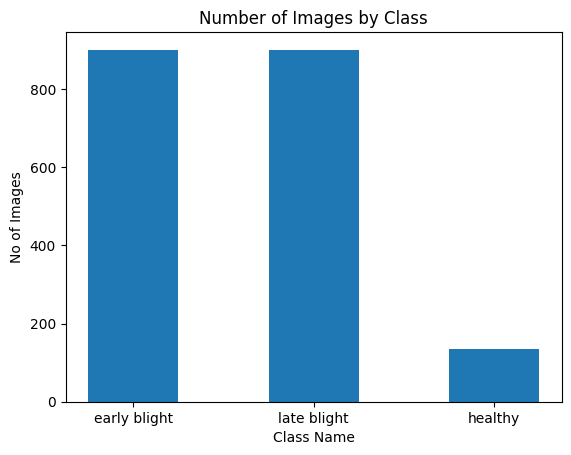

In [37]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
print()
print(f'classes --> {number_classes}')
print()
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('No of Images');

# Visualize the images

### Using PIL

Image height and width : (256, 256)
Image class : Late_blight


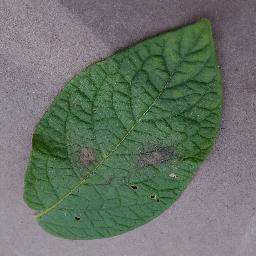

In [11]:
import random
from pathlib import Path
from PIL import Image

data_path = list(Path(DATA_DIR).glob('*/*/*.JPG'))
random_image = random.choice(data_path)
class_image = random_image.parent.stem

img = Image.open(random_image)
print(f'Image height and width : {img.height, img.width}')
print(f'Image class : {class_image.split('___')[1:][0]}')
img

### Using plt.imshow()

image class --> Late_blight, image shape --> (256, 256, 3) --> [height, width, channels]


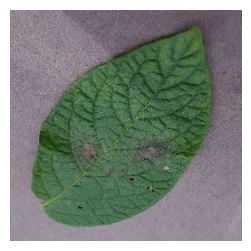

In [19]:
import matplotlib.pyplot as plt
import numpy as np

img_as_array = np.asarray(img)

plt.figure(figsize=(6, 3))
plt.imshow(img_as_array)
plt.axis('off')

print(f'image class --> {class_image.split('___')[1:][0]}, image shape --> {img_as_array.shape} --> [height, width, channels]')

In [24]:
import torch, torchvision
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(128, 128)),
    # transforms.RandomHorizontalFlip(p=0.5),
    # transforms.RandomRotation(degrees=10),
    # transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
    # transforms.RandomInvert(p=0.5),
    # transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

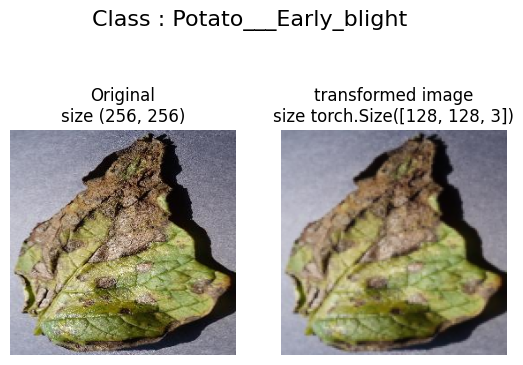

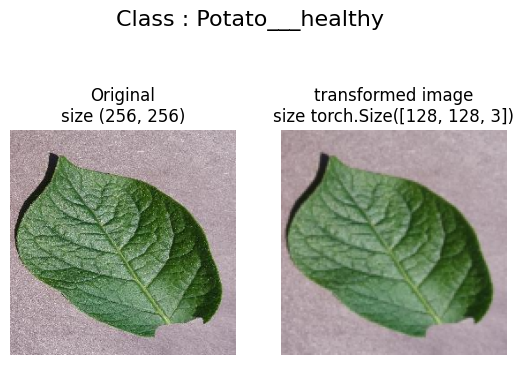

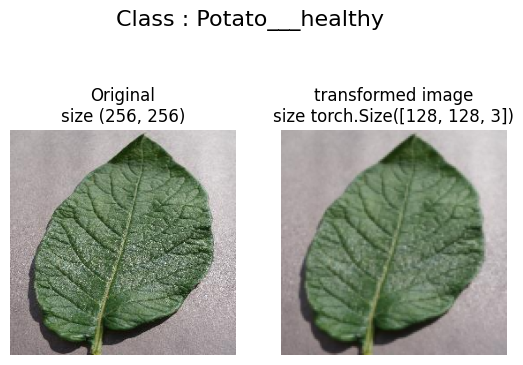

In [25]:
from helper_function.plot_image import plot_transformed_images
plot_transformed_images(image_paths = data_path,
                         transform = data_transform, n = 3, seed=42)